# Ratio of cases controls per diseases for different ventiles

First version: 22/07/2022 

Last modification:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### -Read diseases

In [3]:
### The following file contain all the diseases of relevance without filtering by QC
df_diseases = pd.read_csv("/NVME/decrypted/scratch/multitrait/UK_BIOBANK_ZERO/diseases_cov/22_07_2022_diseases.csv", sep=',')
### Remark-> This file can be generated modifying the code in '/image_to_participant/main_create_csv_diseases_covariants.R'

save_files = "~/retina-phenotypes/complementary/N_cases_diseases_per_Ventile/"

### -Read Ventiles

In [4]:
# Very ugly way :/
df_v0 = pd.read_csv("/HDD/data/ukbb/fundus/qc/ageCorrected_ventiles0.txt", sep=',') 
df_v1 = pd.read_csv("/HDD/data/ukbb/fundus/qc/ageCorrected_ventiles1.txt", sep=',') 
df_v2 = pd.read_csv("/HDD/data/ukbb/fundus/qc/ageCorrected_ventiles2.txt", sep=',') 
df_v3 = pd.read_csv("/HDD/data/ukbb/fundus/qc/ageCorrected_ventiles3.txt", sep=',') 
df_v4 = pd.read_csv("/HDD/data/ukbb/fundus/qc/ageCorrected_ventiles4.txt", sep=',') 
df_v5 = pd.read_csv("/HDD/data/ukbb/fundus/qc/ageCorrected_ventiles5.txt", sep=',') 
df_v6 = pd.read_csv("/HDD/data/ukbb/fundus/qc/ageCorrected_ventiles6.txt", sep=',') 
df_v7 = pd.read_csv("/HDD/data/ukbb/fundus/qc/ageCorrected_ventiles7.txt", sep=',') 
df_v8 = pd.read_csv("/HDD/data/ukbb/fundus/qc/ageCorrected_ventiles8.txt", sep=',') 
df_v9 = pd.read_csv("/HDD/data/ukbb/fundus/qc/ageCorrected_ventiles9.txt", sep=',') 
df_v10 = pd.read_csv("/HDD/data/ukbb/fundus/qc/ageCorrected_ventiles10.txt", sep=',') 
df_v11 = pd.read_csv("/HDD/data/ukbb/fundus/qc/ageCorrected_ventiles11.txt", sep=',') 
df_v12 = pd.read_csv("/HDD/data/ukbb/fundus/qc/ageCorrected_ventiles12.txt", sep=',') 
df_v13 = pd.read_csv("/HDD/data/ukbb/fundus/qc/ageCorrected_ventiles13.txt", sep=',') 
df_v14 = pd.read_csv("/HDD/data/ukbb/fundus/qc/ageCorrected_ventiles14.txt", sep=',') 
df_v15 = pd.read_csv("/HDD/data/ukbb/fundus/qc/ageCorrected_ventiles15.txt", sep=',') 
df_v16 = pd.read_csv("/HDD/data/ukbb/fundus/qc/ageCorrected_ventiles16.txt", sep=',') 
df_v17 = pd.read_csv("/HDD/data/ukbb/fundus/qc/ageCorrected_ventiles17.txt", sep=',') 
df_v18 = pd.read_csv("/HDD/data/ukbb/fundus/qc/ageCorrected_ventiles18.txt", sep=',') 
df_v19 = pd.read_csv("/HDD/data/ukbb/fundus/qc/ageCorrected_ventiles19.txt", sep=',') 

### -Create csv

In [5]:
def images_to_eids(file_name):
    df_after_QC = df_diseases
    #print(file_name)
    df_v = pd.read_csv("/HDD/data/ukbb/fundus/qc/ageCorrected_"+str(file_name)+".txt", sep=',') 

    df_v.columns = ['image']
    df_v.head(3)

    df_v= df_v['image'].str.split('_', expand=True)
    df_v.columns = ['eid', 'eye', 'date', 'instance']
    df_v = df_v[['eid', 'date']]
    # sorting by first name
    df_v.sort_values("eid", inplace = True)
    #print('Before drop duplicates ', df_v.shape[0])

    # dropping ALL duplicate values
    df_v.drop_duplicates(subset ="eid", keep = 'first', inplace = True)
    #print('After drop duplicates ', df_v.shape[0])
    df_v= df_v.astype({"eid": int})
    # Merge
    df_after_QC = pd.merge(df_v, df_after_QC, how='left', on='eid')
    #print('Merge ', df_after_QC.shape[0])
    return df_v, df_after_QC

In [6]:
#print(df_merge_v0.columns)
#print(df_merge_v0['age_pulmonary_embolism_00'].value_counts())
def plot_diseases_ventiles(lista, df_merge_v0, file_name, N_total):
    print(file_name)
    aux=[]
    aux_ratio=[]
    
    for i in range(len(lista)):
        title=lista[i]
        #plt.figure()
        size_1 = len(df_merge_v0[title])- df_merge_v0[title].isna().sum()
        #print(title + " N=" + str(size_1))
        
        #print(str(size_1))
        #df_merge_v0[title].plot.hist(bins=100, rwidth=0.5)
        #plt.title(title + " N=" + str(size_1))
        #plt.xlabel(title)
        #plt.ylabel('Frequency')
        #plt.show()
        
        data = {'disease': title, 'N_'+file_name: str(size_1)}
        data_ratio = {'disease': title, 'ratio_'+file_name: str(size_1/N_total)}
        aux.append(data)
        aux_ratio.append(data_ratio)
        
    return pd.DataFrame(aux), pd.DataFrame(aux_ratio)

In [7]:
list_file_names= ['ventiles0', 'ventiles1', 'ventiles2', 'ventiles3', 'ventiles4', 'ventiles5', 
                'ventiles6', 'ventiles7', 'ventiles8', 'ventiles9', 'ventiles10', 'ventiles11',
                'ventiles12', 'ventiles13', 'ventiles14', 'ventiles15','ventiles16', 'ventiles17', 
                'ventiles18', 'ventiles19']
lista =['age_death',
       'age_stroke_00', 'age_stroke_10', 'age_stroke_20', 'age_stroke_30',
       'age_heartattack_00', 'age_heartattack_10', 'age_heartattack_20', 'age_heartattack_30',
       'age_angina_00', 'age_angina_10', 'age_angina_20', 'age_angina_30',
       'age_DVT_00', 'age_DVT_10', 'age_DVT_20', 'age_DVT_30',
       'age_pulmonary_embolism_00', 'age_pulmonary_embolism_10', 'age_pulmonary_embolism_20', 'age_pulmonary_embolism_30',
       'age_diabetes_00', 'age_diabetes_10', 'age_diabetes_20', 'age_diabetes_30',
       'age_glaucoma_00', 'age_glaucoma_10', 'age_glaucoma_20', 'age_glaucoma_30',
       'age_cataract_00', 'age_cataract_10', 'age_cataract_20', 'age_cataract_30',
       'age_other_serious_eye_condition_00', 'age_other_serious_eye_condition_10', 
       'age_other_serious_eye_condition_20', 'age_other_serious_eye_condition_30']

for j in range(len(list_file_names)):
    file_name = list_file_names[j]

    df_v0, df_merge = images_to_eids(file_name)
    N_total =df_merge.shape[0]
    df_ventile_disease, df_ventile_disease_ratio = plot_diseases_ventiles(lista, df_merge, file_name, N_total)
    
    df_ventile_disease.to_csv(save_files+str(file_name)+'_N_cases.csv', index=False)
    df_ventile_disease_ratio.to_csv(save_files+str(file_name)+'_ratios.csv', index=False)


ventiles0
ventiles1
ventiles2
ventiles3
ventiles4
ventiles5
ventiles6
ventiles7
ventiles8
ventiles9
ventiles10
ventiles11
ventiles12
ventiles13
ventiles14
ventiles15
ventiles16
ventiles17
ventiles18
ventiles19


### -Make plot

In [8]:
num_of_ventiles=10
def diseases_ventiles(file_type, save_files):
    for i in range(num_of_ventiles):
        if i==0:
            df_disease_init = pd.read_csv(save_files+'/ventiles0'+str(file_type)+'.csv', sep=',')
            print('Check the len')
            print(len(df_disease_init))
        else:
            df_disease_vi = pd.read_csv(save_files+ 'ventiles'+str(i)+str(file_type)+'.csv', sep=',')
            df_merge = pd.merge(df_disease_vi, df_disease_init, how='inner', on='disease')
            print(len(df_disease_vi), len(df_disease_init), len(df_merge))
            df_disease_init = df_merge
    return df_merge

In [9]:
df_N_cases=diseases_ventiles('_N_cases', save_files)
df_ratios=diseases_ventiles('_ratios', save_files)

Check the len
37
37 37 37
37 37 37
37 37 37
37 37 37
37 37 37
37 37 37
37 37 37
37 37 37
37 37 37
Check the len
37
37 37 37
37 37 37
37 37 37
37 37 37
37 37 37
37 37 37
37 37 37
37 37 37
37 37 37


## Plots all instances:

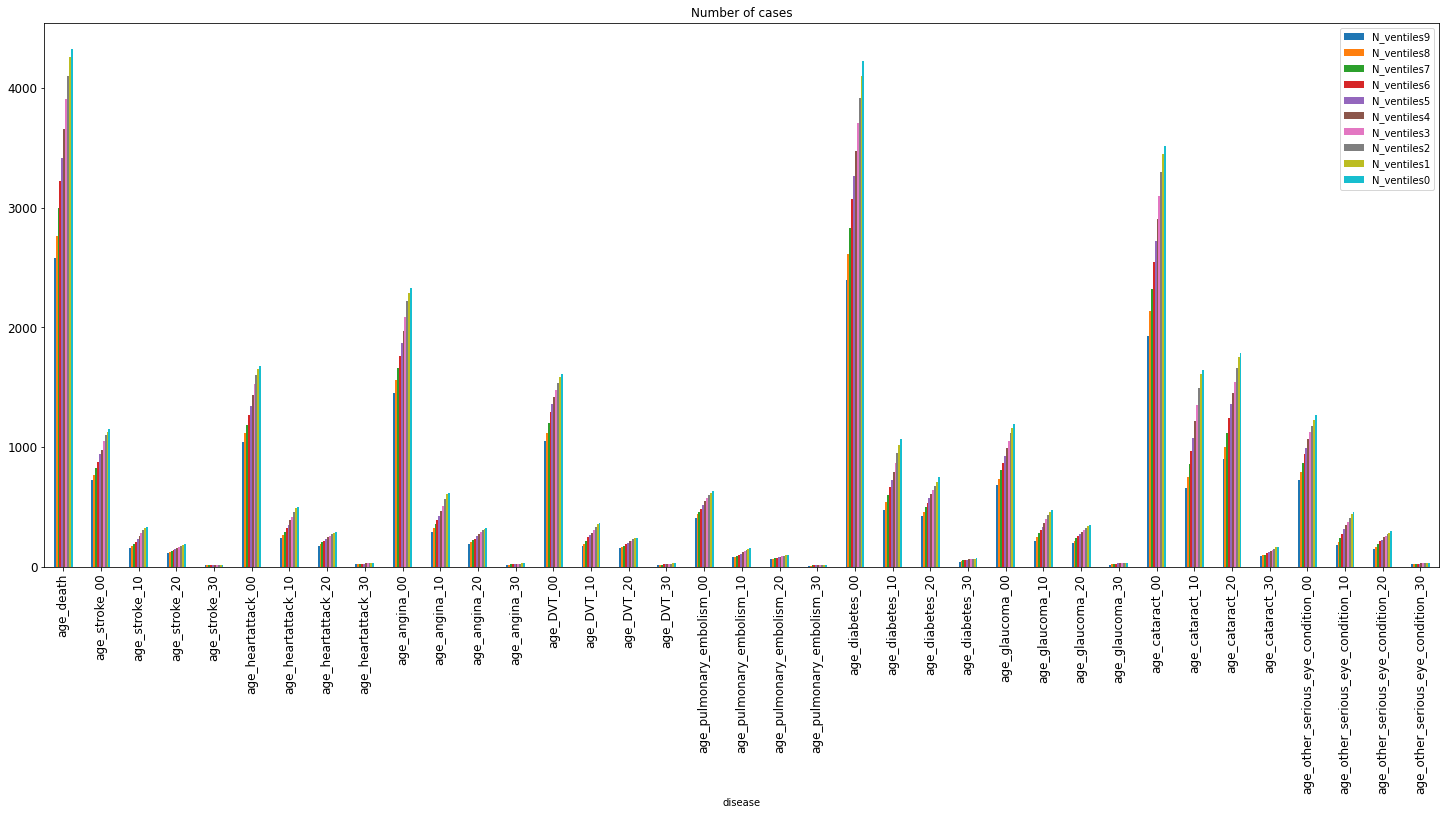

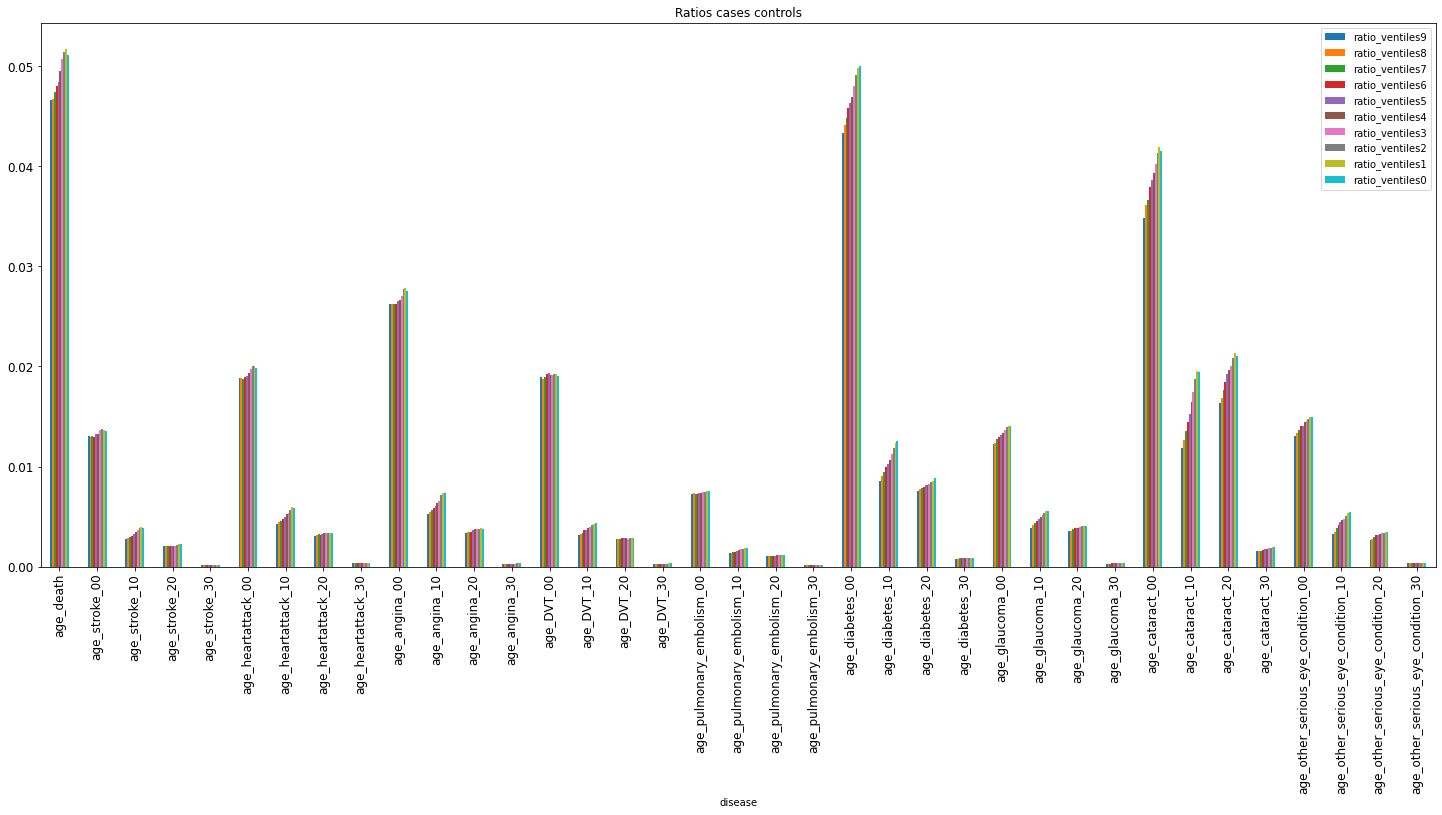

In [10]:
def bar_plot(df_used, title_name, set_index_column):
    #ax= df_N_cases.plot()
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5),fancybox=True, shadow=True, ncol=5)
    ax = df_used.set_index(set_index_column).plot.bar(rot=90, title=title_name, figsize=(25,10), fontsize=12)
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5),fancybox=True, shadow=True, ncol=5)

bar_plot(df_N_cases, 'Number of cases', 'disease')
bar_plot(df_ratios, 'Ratios cases controls', 'disease')
#df_ratios.plot()

### Plots per disease (instances grouped):

In [11]:
## Group the different instances by diseases
df_N_cases_split = df_N_cases.copy()
df_ratios_split = df_ratios.copy()

df_N_cases_split[['first', 'second', 'third', 'fourth', 'fifth', 'sixth']]= df_N_cases_split['disease'].str.split('_', expand=True)
df_ratios_split[['first', 'second', 'third', 'fourth', 'fifth', 'sixth']]= df_N_cases_split['disease'].str.split('_', expand=True)

df_N_cases_groupby=df_N_cases_split.groupby(by=["second"]).sum()
df_ratios_groupby=df_ratios_split.groupby(by=["second"]).sum()

In [12]:
df_N_cases_groupby

,N_ventiles9,N_ventiles8,N_ventiles7,N_ventiles6,N_ventiles5,N_ventiles4,N_ventiles3,N_ventiles2,N_ventiles1,N_ventiles0
second,,,,,,,,,,
DVT,1388,1481,1603,1747,1840,1933,2019,2116,2197,2249
angina,1937,2101,2255,2399,2576,2731,2904,3112,3237,3298
cataract,3566,3984,4387,4864,5283,5705,6138,6606,6972,7108
death,2576,2767,3000,3221,3417,3661,3911,4104,4258,4329
diabetes,3325,3660,3978,4325,4621,4930,5275,5605,5891,6112
glaucoma,1098,1208,1338,1449,1557,1669,1782,1894,1980,2040
heartattack,1468,1586,1699,1824,1947,2094,2227,2351,2450,2495
other,1072,1183,1311,1449,1552,1682,1776,1879,1984,2055
pulmonary,546,592,624,666,713,766,810,839,875,903


In [13]:
 df_ratios_groupby

,ratio_ventiles9,ratio_ventiles8,ratio_ventiles7,ratio_ventiles6,ratio_ventiles5,ratio_ventiles4,ratio_ventiles3,ratio_ventiles2,ratio_ventiles1,ratio_ventiles0
second,,,,,,,,,,
DVT,0.025144,0.024989,0.025360,0.026072,0.026084,0.026147,0.026191,0.026502,0.026701,0.026590
angina,0.035089,0.035450,0.035675,0.035803,0.036518,0.036942,0.037671,0.038977,0.039341,0.038992
cataract,0.064599,0.067221,0.069405,0.072591,0.074893,0.077171,0.079623,0.082738,0.084734,0.084038
death,0.046665,0.046687,0.047462,0.048070,0.048440,0.049522,0.050734,0.051402,0.051749,0.051182
diabetes,0.060233,0.061754,0.062934,0.064546,0.065508,0.066687,0.068428,0.070201,0.071596,0.072262
glaucoma,0.019891,0.020382,0.021168,0.021625,0.022072,0.022576,0.023116,0.023722,0.024064,0.024119
heartattack,0.026593,0.026760,0.026879,0.027221,0.027601,0.028325,0.028889,0.029446,0.029776,0.029498
other,0.019420,0.019961,0.020741,0.021625,0.022001,0.022752,0.023039,0.023534,0.024112,0.024296
pulmonary,0.009891,0.009989,0.009872,0.009939,0.010108,0.010362,0.010507,0.010508,0.010634,0.010676


In [14]:
df_N_cases_groupby['second']=df_N_cases_groupby.index
df_ratios_groupby['second']=df_ratios_groupby.index

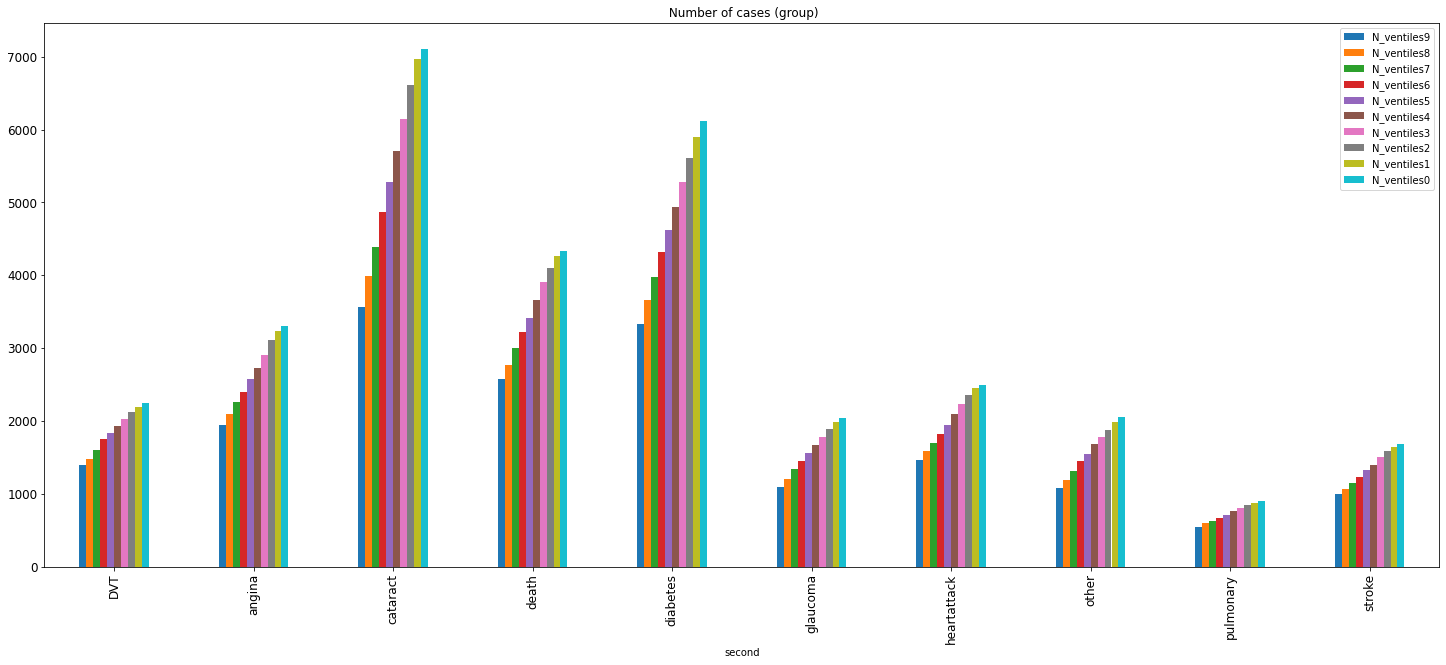

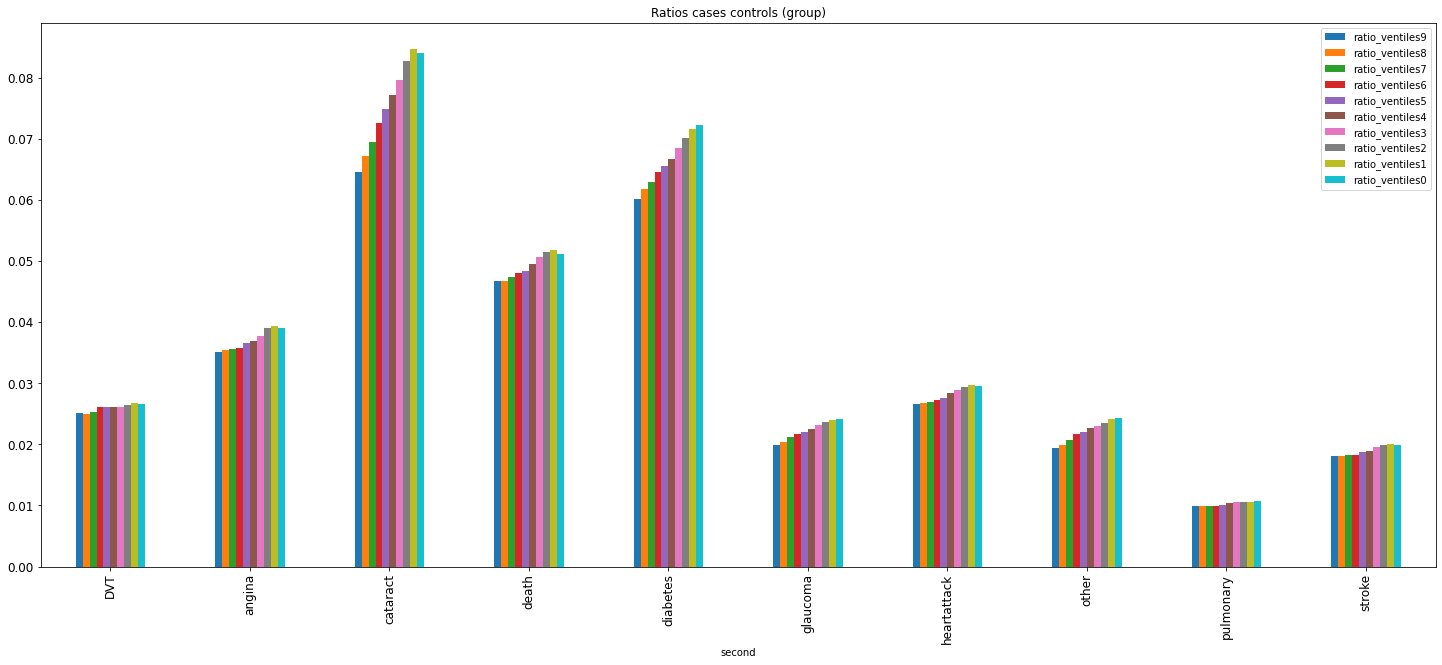

In [15]:
bar_plot(df_N_cases_groupby, ' Number of cases (group)', 'second')
bar_plot(df_ratios_groupby, 'Ratios cases controls (group)', 'second')

# Quantile specific:

In [52]:
Quantile='N_ventiles2'
Quantile_ratio='ratio_ventiles2'

df_quantile2=pd.DataFrame([])
df_quantile2['diseases']=df_N_cases_groupby['second']
df_quantile2.reset_index(drop=True, inplace=True)
df_quantile2[Quantile]=df_N_cases_groupby[Quantile].values

df_quantile2_ratio=pd.DataFrame([])
df_quantile2_ratio['diseases']=df_ratios_groupby['second']
df_quantile2_ratio.reset_index(drop=True, inplace=True)
df_quantile2_ratio[Quantile_ratio]=df_ratios_groupby[Quantile_ratio].values


<AxesSubplot:title={'center':'Ratios ventile 2'}, xlabel='diseases'>

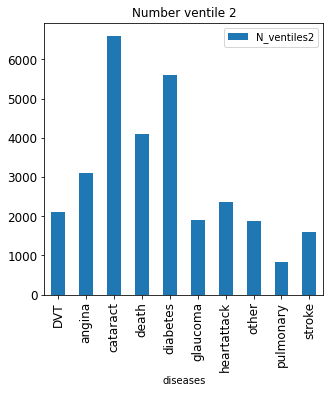

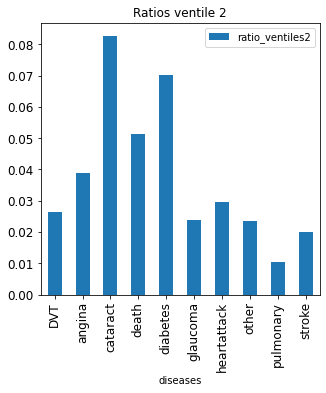

In [61]:
df_quantile2.set_index('diseases').plot.bar(rot=90, title='Number ventile 2', figsize=(5,5), fontsize=12)
df_quantile2_ratio.set_index('diseases').plot.bar(rot=90, title='Ratios ventile 2', figsize=(5,5), fontsize=12)

In [62]:
df_quantile2_ratio

,diseases,ratio_ventiles2
0,DVT,0.026502
1,angina,0.038977
2,cataract,0.082738
3,death,0.051402
4,diabetes,0.070201
5,glaucoma,0.023722
6,heartattack,0.029446
7,other,0.023534
8,pulmonary,0.010508
9,stroke,0.019952


In [64]:
df_quantile2

,diseases,N_ventiles2
0,DVT,2116
1,angina,3112
2,cataract,6606
3,death,4104
4,diabetes,5605
5,glaucoma,1894
6,heartattack,2351
7,other,1879
8,pulmonary,839
9,stroke,1593
